<a href="https://colab.research.google.com/github/Aarya718/Codsoft-projects/blob/main/Creditcardfrauddetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK-5 : Creditcard Fraud Detection

Name: Aarya Ramchandra Tarphe

Batch: February

Domain: Data Science

Aim: Build a model that detects creditcard fraud by using Linear Regression and Decision Tree Classification Machine learning algorithms.

# IMPORTING PYTHON LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# UPLOADING THE DATASET

In [2]:
df = pd.read_csv('/content/credit_data_norm.csv')

# DATA CLEANING AND PROCESSING

In [3]:
df.head()

,xslth_balance_0,fmeyv_balance_frequency_1,pwnjx_purchases_2,dxuli_oneoff_purchases_3,ojukq_installments_purchases_4,bvnag_cash_advance_5,gdoka_purchases_frequency_6,vozgu_oneoff_purchases_frequency_7,byefw_purchases_installments_frequency_8,jltvu_cash_advance_frequency_9,pmfyh_cash_advance_trx_10,jgcmz_purchases_trx_11,ehdqb_credit_limit_12,matvy_payments_13,itzsv_minimum_payments_14,ubvma_prc_full_payment_15,lkrsn_tenure_16
0,-0.080006,-0.059089,-0.018512,-0.014534,-0.01403,-0.020766,-0.323684,-0.202458,-0.281104,-0.090096,-0.026413,-0.035502,-0.116676,-0.030191,-0.009485,-0.153715,0.080447
1,0.086015,0.031820,-0.020457,-0.014534,-0.01827,0.115918,-0.490351,-0.202458,-0.364437,0.076571,0.006107,-0.041089,0.083658,0.046724,0.002724,0.068507,0.080447
2,0.048872,0.122729,-0.004691,0.004434,-0.01827,-0.020766,0.509649,0.797542,-0.364437,-0.090096,-0.026413,-0.007569,0.100352,-0.021905,-0.003101,-0.153715,0.080447
3,0.005367,-0.240907,0.010110,0.022241,-0.01827,-0.016401,-0.407018,-0.119125,-0.364437,-0.034541,-0.018283,-0.038296,0.100352,-0.034170,NaN,-0.153715,0.080447
4,-0.039214,0.122729,-0.020131,-0.014142,-0.01827,-0.020766,-0.407018,-0.119125,-0.364437,-0.090096,-0.026413,-0.038296,-0.109998,-0.020796,-0.008107,-0.153715,0.080447


In [4]:
df.describe()

,xslth_balance_0,fmeyv_balance_frequency_1,pwnjx_purchases_2,dxuli_oneoff_purchases_3,ojukq_installments_purchases_4,bvnag_cash_advance_5,gdoka_purchases_frequency_6,vozgu_oneoff_purchases_frequency_7,byefw_purchases_installments_frequency_8,jltvu_cash_advance_frequency_9,pmfyh_cash_advance_trx_10,jgcmz_purchases_trx_11,ehdqb_credit_limit_12,matvy_payments_13,itzsv_minimum_payments_14,ubvma_prc_full_payment_15,lkrsn_tenure_16
count,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.949000e+03,8.950000e+03,8.637000e+03,8.950000e+03,8.950000e+03
mean,-1.524293e-16,-7.006983e-15,-4.604634e-17,-2.639726e-17,5.239756e-17,-8.931403e-19,-2.312241e-16,-2.327722e-15,6.295647e-16,-1.099654e-15,5.755793e-18,2.302317e-17,3.811158e-17,2.818354e-17,4.437293e-17,-1.085265e-15,2.222927e-17
std,1.093061e-01,2.369040e-01,4.356961e-02,4.072220e-02,4.019281e-02,4.449062e-02,4.013707e-01,2.983361e-01,3.974478e-01,1.334143e-01,5.548493e-02,6.943477e-02,1.214964e-01,5.707766e-02,3.105045e-02,2.924992e-01,2.230551e-01
min,-8.215425e-02,-8.772707e-01,-2.045705e-02,-1.453433e-02,-1.826967e-02,-2.076642e-02,-4.903505e-01,-2.024577e-01,-3.644373e-01,-9.009613e-02,-2.641323e-02,-4.108892e-02,-1.483956e-01,-3.416982e-02,-1.131044e-02,-1.537146e-01,-9.195531e-01
25%,-7.541787e-02,1.161827e-02,-1.964882e-02,-1.453433e-02,-1.826967e-02,-2.076642e-02,-4.070175e-01,-2.024577e-01,-3.644373e-01,-9.009613e-02,-2.641323e-02,-3.829562e-02,-9.664272e-02,-2.661333e-02,-9.097206e-03,-1.537146e-01,8.044693e-02
50%,-3.629074e-02,1.227293e-01,-1.308994e-02,-1.360207e-02,-1.431412e-02,-2.076642e-02,9.649452e-03,-1.191247e-01,-1.977703e-01,-9.009613e-02,-2.641323e-02,-2.153584e-02,-4.989815e-02,-1.727557e-02,-7.222747e-03,-1.537146e-01,8.044693e-02
75%,2.571347e-02,1.227293e-01,2.180385e-03,-3.687907e-04,2.558660e-03,2.862919e-03,4.263165e-01,9.754232e-02,3.855627e-01,5.805187e-02,6.107099e-03,6.397116e-03,6.696329e-02,3.312018e-03,-5.067794e-04,-1.085765e-02,8.044693e-02
max,9.178457e-01,1.227293e-01,9.795430e-01,9.854657e-01,9.817303e-01,9.792336e-01,5.096495e-01,7.975423e-01,6.355627e-01,9.099039e-01,9.735868e-01,9.589111e-01,8.516044e-01,9.658302e-01,9.886896e-01,8.462854e-01,8.044693e-02


In [5]:
df.shape

(8950, 17)

In [6]:
df.columns

Index(['xslth_balance_0', 'fmeyv_balance_frequency_1', 'pwnjx_purchases_2',
       'dxuli_oneoff_purchases_3', 'ojukq_installments_purchases_4',
       'bvnag_cash_advance_5', 'gdoka_purchases_frequency_6',
       'vozgu_oneoff_purchases_frequency_7',
       'byefw_purchases_installments_frequency_8',
       'jltvu_cash_advance_frequency_9', 'pmfyh_cash_advance_trx_10',
       'jgcmz_purchases_trx_11', 'ehdqb_credit_limit_12', 'matvy_payments_13',
       'itzsv_minimum_payments_14', 'ubvma_prc_full_payment_15',
       'lkrsn_tenure_16'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   xslth_balance_0                           8950 non-null   float64
 1   fmeyv_balance_frequency_1                 8950 non-null   float64
 2   pwnjx_purchases_2                         8950 non-null   float64
 3   dxuli_oneoff_purchases_3                  8950 non-null   float64
 4   ojukq_installments_purchases_4            8950 non-null   float64
 5   bvnag_cash_advance_5                      8950 non-null   float64
 6   gdoka_purchases_frequency_6               8950 non-null   float64
 7   vozgu_oneoff_purchases_frequency_7        8950 non-null   float64
 8   byefw_purchases_installments_frequency_8  8950 non-null   float64
 9   jltvu_cash_advance_frequency_9            8950 non-null   float64
 10  pmfyh_cash_advance_trx_10           

In [8]:
print("Duplicates before removal:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after removal:", df.duplicated().sum())

Duplicates before removal: 0
Duplicates after removal: 0


In [9]:
df.isnull().sum()

,0
xslth_balance_0,0
fmeyv_balance_frequency_1,0
pwnjx_purchases_2,0
dxuli_oneoff_purchases_3,0
ojukq_installments_purchases_4,0
bvnag_cash_advance_5,0
gdoka_purchases_frequency_6,0
vozgu_oneoff_purchases_frequency_7,0
byefw_purchases_installments_frequency_8,0
jltvu_cash_advance_frequency_9,0


In [11]:
threshold = 0.5
df = df[df.columns[df.isnull().mean() < threshold]]

In [12]:
df.fillna(df.median(), inplace=True)

In [13]:
for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# DATA VISUALIZATION

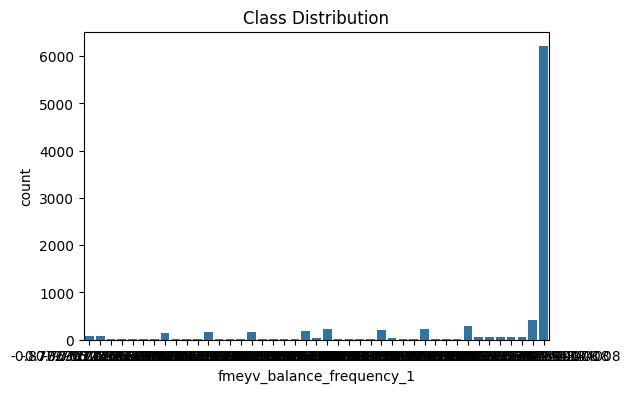

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(x='fmeyv_balance_frequency_1', data=df)
plt.title('Class Distribution')
plt.show()

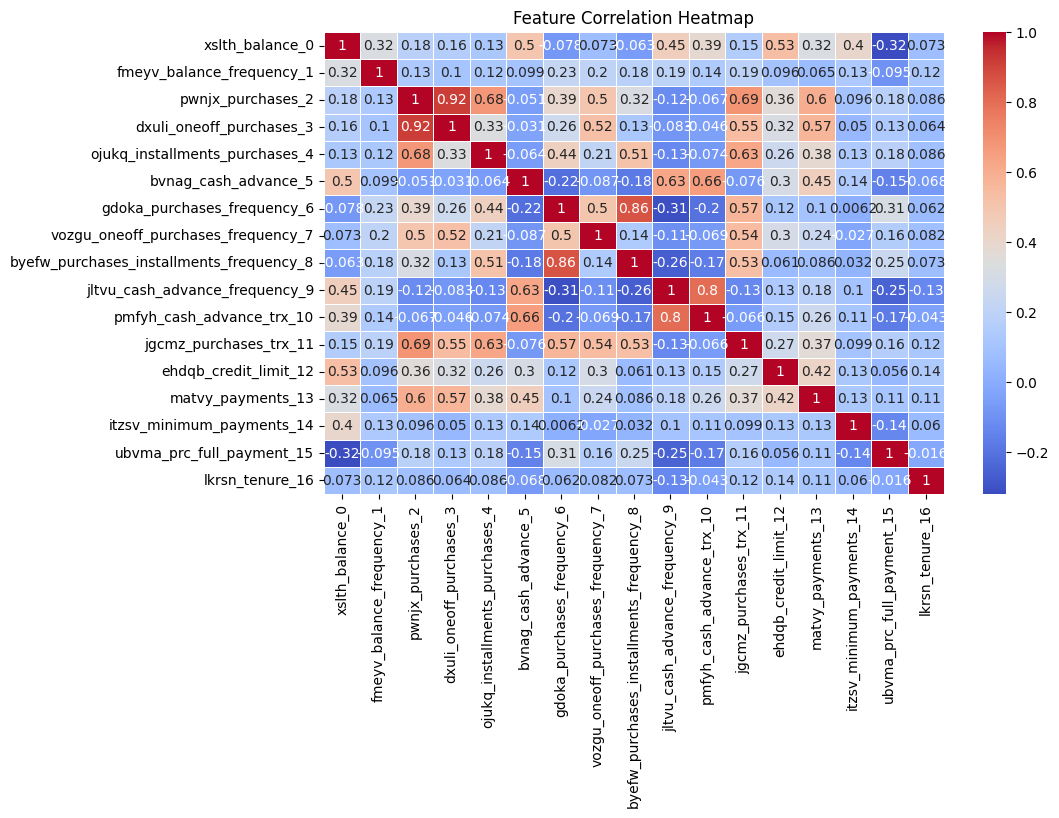

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

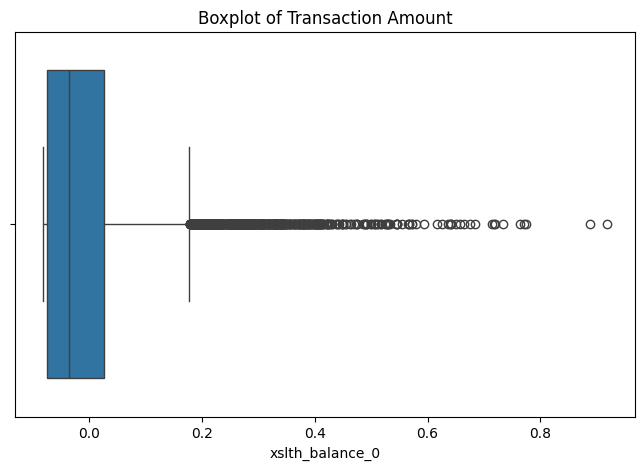

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['xslth_balance_0'])
plt.title('Boxplot of Transaction Amount')
plt.show()

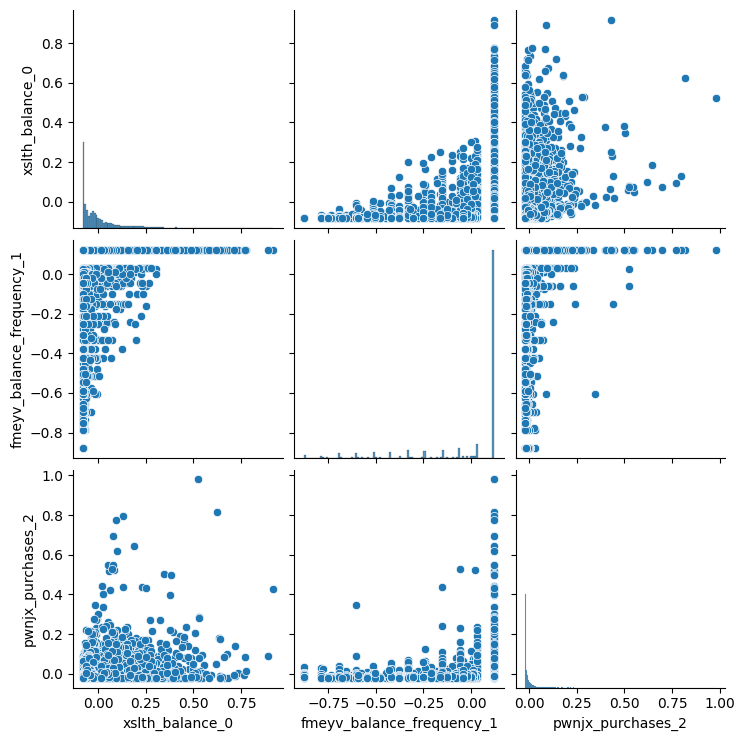

In [22]:
sns.pairplot(df[['xslth_balance_0', 'fmeyv_balance_frequency_1', 'pwnjx_purchases_2']])
plt.show()

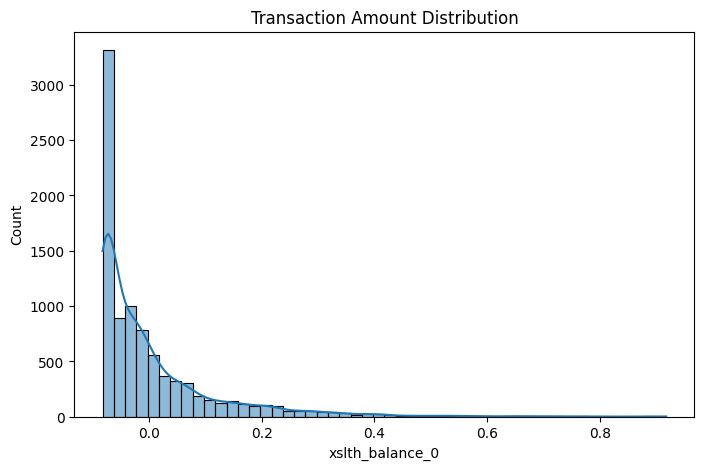

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(df['xslth_balance_0'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.show()


# FEATURE ENGINEERING

In [30]:
X = df.drop('xslth_balance_0' , axis = 1)
y = df['xslth_balance_0']

In [31]:
X_train , X_test ,y_train ,y_test = train_test_split(X , y ,test_size = 0.2 ,random_state = 2)

In [32]:
lg = LogisticRegression()

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['xslth_balance_0', 'fmeyv_balance_frequency_1']] = scaler.fit_transform(df[['xslth_balance_0', 'fmeyv_balance_frequency_1']])


In [36]:
print(y_train.dtype)
print(np.unique(y_train))

float64
[-0.75163981 -0.75163972 -0.75163926 ...  7.08191795  8.13440805
  8.39748862]


# MODEL BUILDING AND EXECUTION

In [37]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [38]:
y_train = np.round(y_train).astype(int)
y_test = np.round(y_test).astype(int)

In [39]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

LogisticRegression()

In [41]:
y_train_predict = lg.predict(X_train)

In [42]:
print(accuracy_score(y_train , y_train_predict))

0.878072625698324


In [43]:
y_test_predict = lg.predict(X_test)

In [44]:
print(accuracy_score(y_test , y_test_predict))

0.8865921787709498


In [25]:
df = pd.get_dummies(df, drop_first=True)

In [49]:
import numpy as np

print(y_train.dtype)
print(np.unique(y_train))

float64
[-0.75163981 -0.75163972 -0.75163926 ...  7.08191795  8.13440805
  8.39748862]


In [50]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

base_estimator = DecisionTreeRegressor()

bagging_regressor = BaggingRegressor(n_estimators=10, random_state=42)

bagging_regressor.fit(X_train, y_train)


BaggingRegressor(random_state=42)

In [47]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [60]:
!pip install --upgrade scikit-learn


In [72]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

base_regressor = DecisionTreeRegressor()

bagging_regressor = BaggingRegressor(n_estimators=10, random_state=42)

bagging_regressor.fit(X_train, y_train)

predictions = bagging_regressor.predict(X_test)


In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error

bagging_regressor = BaggingRegressor(DecisionTreeRegressor(), n_estimators=10, random_state=42, max_samples=0.4)

bagging_regressor.fit(X_train, y_train)

predictions = bagging_regressor.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.06419775339771998


Hence Creditcard Fraud Detection using Random forest classification and Linear Regression Algorithm successfully implemented.